<a href="https://colab.research.google.com/github/bagher2901/colab_deep_learn/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# classification

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.__version__

'2.11.0'

In [3]:
keras.__version__

'2.11.0'

In [4]:
fmnist_data = keras.datasets.fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train[:100]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2,
       0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
       9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8], dtype=uint8)

In [8]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [9]:
import matplotlib.pyplot as plt

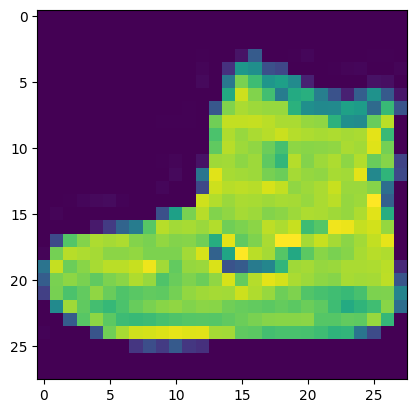

In [10]:
plt.figure()
plt.imshow(x_train[0])
# plt.imshow(x_train[1], cmap="gray")


In [11]:
x_train, x_test = x_train/255.0 , x_test/255.0


In [12]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(75,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


# model = keras.models.Sequential([  
#     keras.layers.Flatten(input_shape=[28,28]),
#     keras.layers.Dense(100,activation='relu'),
#     keras.layers.Dense(75,activation='relu'),
#     keras.layers.Dense(10,activation='softmax')
# ])



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 10)                760       
                                                                 
Total params: 86,835
Trainable params: 86,835
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
weights , bias = model.layers[1].get_weights()
weights

array([[-0.05106807,  0.07254577,  0.06685224, ...,  0.07038248,
        -0.0155249 , -0.06508557],
       [-0.06072105, -0.04550415,  0.072037  , ..., -0.05400571,
         0.03097597, -0.04753198],
       [ 0.02590306,  0.01598561,  0.080458  , ..., -0.02587397,
        -0.05707897,  0.02163112],
       ...,
       [-0.00087237,  0.06688099, -0.01978474, ...,  0.01920567,
        -0.02973877, -0.04315905],
       [ 0.01884253,  0.061318  ,  0.02605444, ...,  0.07997108,
         0.02663534,  0.01694468],
       [-0.02862668,  0.02434043,  0.04900418, ..., -0.06525756,
         0.05472378,  0.01025434]], dtype=float32)

# compile model

In [16]:
from keras.optimizers import optimizer_legacy
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# model fit

In [17]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 17s 9ms/step - loss: 0.7971 - accuracy: 0.7354 - val_loss: 0.5616 - val_accuracy: 0.8046
Epoch 2/10
1594/1594 [==============================] - 10s 6ms/step - loss: 0.5142 - accuracy: 0.8223 - val_loss: 0.4947 - val_accuracy: 0.8267
Epoch 3/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.4639 - accuracy: 0.8370 - val_loss: 0.4614 - val_accuracy: 0.8387
Epoch 4/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4350 - accuracy: 0.8473 - val_loss: 0.4334 - val_accuracy: 0.8492
Epoch 5/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4151 - accuracy: 0.8545 - val_loss: 0.4386 - val_accuracy: 0.8411
Epoch 6/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3977 - accuracy: 0.8594 - val_loss: 0.4035 - val_accuracy: 0.8588
Epoch 7/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3840 - accuracy: 0.8641 - val_loss: 0.3973 - val_accurac

In [18]:
history.history

{'loss': [0.7971353530883789,
  0.5142472386360168,
  0.4639270305633545,
  0.43498143553733826,
  0.41506463289260864,
  0.3976627290248871,
  0.38403409719467163,
  0.372570276260376,
  0.36285653710365295,
  0.35323193669319153],
 'accuracy': [0.7353725433349609,
  0.8223137259483337,
  0.8370392322540283,
  0.8473333120346069,
  0.8545294404029846,
  0.8593529462814331,
  0.8640588521957397,
  0.8681372404098511,
  0.871666669845581,
  0.8750980496406555],
 'val_loss': [0.5616311430931091,
  0.49469906091690063,
  0.4614127576351166,
  0.43340346217155457,
  0.438607394695282,
  0.40348273515701294,
  0.3973008096218109,
  0.38318848609924316,
  0.3846679627895355,
  0.4003593623638153],
 'val_accuracy': [0.8045555353164673,
  0.8266666531562805,
  0.8386666774749756,
  0.8492222428321838,
  0.8411111235618591,
  0.8587777614593506,
  0.8618888854980469,
  0.86644446849823,
  0.8627777695655823,
  0.8627777695655823]}

In [19]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1594}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

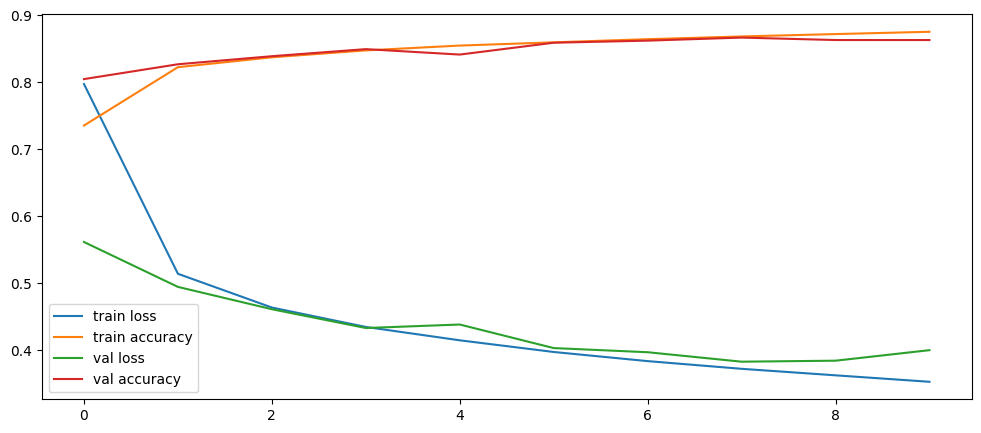

In [24]:
fig , ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['loss'], label='train loss')
ax.plot(history.history['accuracy'], label='train accuracy')
ax.plot(history.history['val_loss'], label='val loss')
ax.plot(history.history['val_accuracy'], label='val accuracy')
ax.legend()

In [27]:
 model.evaluate(x_test, y_test,verbose=0)

[0.4211207628250122, 0.8539000153541565]

In [30]:
x3 = x_test[0:3,:,:]
x3.shape

(3, 28, 28)

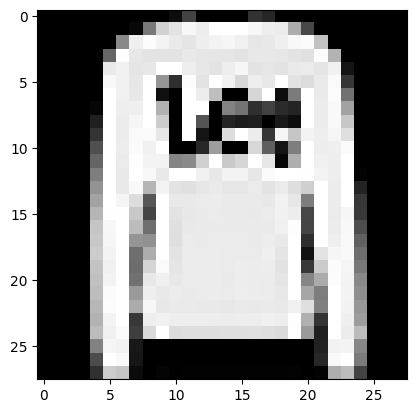

In [42]:
plt.imshow(x3[1],cmap='gray')

In [36]:
print(model.predict(x3).round(3))
print(model.predict(x3).shape)

1/1 [==============================] - 0s 48ms/step
[[0.    0.    0.    0.    0.    0.057 0.    0.039 0.002 0.902]
 [0.    0.    0.956 0.    0.029 0.    0.015 0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
1/1 [==============================] - 0s 31ms/step
(3, 10)


In [38]:
import numpy as np
np.argmax(model.predict(x3).round(3),axis=1)

1/1 [==============================] - 0s 155ms/step


array([9, 2, 1])

In [43]:
y_test[0:3]

array([9, 2, 1], dtype=uint8)